In [4]:
from flask import Flask, render_template

app = Flask(__name__)

# Define a list of data to display in the table
data = [
    {'name': 'John', 'age': 30, 'city': 'New York'},
    {'name': 'Alice', 'age': 25, 'city': 'San Francisco'},
    {'name': 'Bob', 'age': 40, 'city': 'Seattle'}
]

@app.route('/')
def index():
    # Pass the data to the HTML template
    return render_template('table.html', data=data)

if __name__ == '__main__':
    app.run()


In [33]:
import rasterio

# input JP2 file path
input_file = '/Users/tnmthai/Downloads/R10m/T59GPM_20230227T222549_B04_10m.jp2'

# output GeoTIFF file path
output_file = '/Users/tnmthai/Downloads/R10m/T59GPM_20230227T222549_B04_10m.tif'

# open input file using rasterio.open()
with rasterio.open(input_file) as src:
    # read the image data and metadata
    img = src.read()
    meta = src.meta.copy()

# update the metadata to reflect the new format
meta.update({'driver': 'GTiff'})

# write the image data to a new GeoTIFF file
with rasterio.open(output_file, 'w', **meta) as dst:
    dst.write(img)

# close input file
src.close()


TypeError: Invalid shape (3, 10980, 10980) for image data

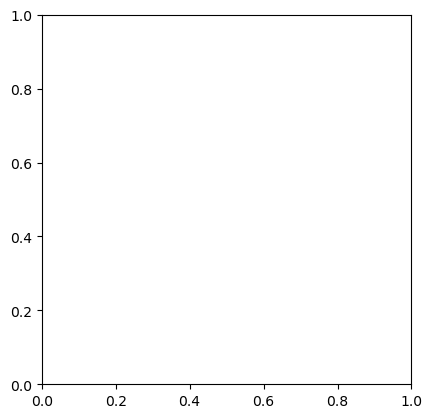

In [52]:
import rasterio
import matplotlib.pyplot as plt

# input file path
input_file = '/Users/tnmthai/Downloads//rgb.tif'

# open input file
with rasterio.open(input_file) as src:
    # read the image as a numpy array
    img = src.read()

# plot the image
plt.imshow(img)
plt.show()


In [40]:
from glob import glob
import rasterio
import os

folder = r"/Users/tnmthai/Downloads/R10m/"
file = r"*.tif"

L2AFolder = glob(folder, recursive = True)
# print(L2AFolder)

L2Abands = [f for f in glob(folder + file) if glob(folder + file) is not None]
print(L2Abands)

['/Users/tnmthai/Downloads/R10m/T59GPM_20230227T222549_B04_10m.tif', '/Users/tnmthai/Downloads/R10m/T59GPM_20230227T222549_B03_10m.tif', '/Users/tnmthai/Downloads/R10m/T59GPM_20230227T222549_B02_10m.tif']


In [38]:
# file_list_10m =[]
# file_list_10m.append(L2Abands[2])
# file_list_10m.append(L2Abands[1])
# file_list_10m.append(L2Abands[0])
# print("Band 10m \n",file_list_10m)÷

Band 10m 
 ['/Users/tnmthai/Downloads/R10m/T59GPM_20230227T222549_B02_10m.tif', '/Users/tnmthai/Downloads/R10m/T59GPM_20230227T222549_B03_10m.tif', '/Users/tnmthai/Downloads/R10m/T59GPM_20230227T222549_B04_10m.tif']


In [51]:
for file_list in L2Abands:
            
    head, tail = os.path.split(file_list)
    print(head, tail )
    # Read metadata of first file
    with rasterio.open(file_list) as src0:
        meta = src0.meta

    # Update meta to reflect the number of layers
    meta.update(count = 3)
    print(meta)
    # Read each layer and write it to stack
    with rasterio.open('/Users/tnmthai/Downloads/rgb.tif', 'w', **meta) as dst:
        for id, layer in enumerate(file_list, start=1):            
            with rasterio.open(layer) as src1:
                dst.write_band(id, src1.read(1))
    print(": Stacking successfully!")            
    



/Users/tnmthai/Downloads/R10m T59GPM_20230227T222549_B04_10m.tif
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 3, 'crs': CRS.from_epsg(32759), 'transform': Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 5200000.0)}


RasterioIOError: '/' not recognized as a supported file format.

In [56]:
import rasterio
import numpy as np

# input file paths for the three bands
band1_file = '/Users/tnmthai/Downloads/R10m/T59GPM_20230227T222549_B04_10m.tif'
band2_file = '/Users/tnmthai/Downloads/R10m/T59GPM_20230227T222549_B03_10m.tif'
band3_file = '/Users/tnmthai/Downloads/R10m/T59GPM_20230227T222549_B02_10m.tif'

# open the three input files
with rasterio.open(band1_file) as src1, rasterio.open(band2_file) as src2, rasterio.open(band3_file) as src3:
    # read the data from each band
    band1_data = src1.read(1)
    band2_data = src2.read(1)
    band3_data = src3.read(1)
    # stack the data from each band into a 3D array
    stacked_data = np.stack((band1_data, band2_data, band3_data))
    # get the metadata from one of the input files
    meta = src1.meta
    # update the metadata to reflect the new multi-band data
    meta.update(count=3)
    # write the stacked data to a new output file
    with rasterio.open('/Users/tnmthai/Downloads/R10m/multi_band.tif', 'w', **meta) as dst:
        dst.write(stacked_data)


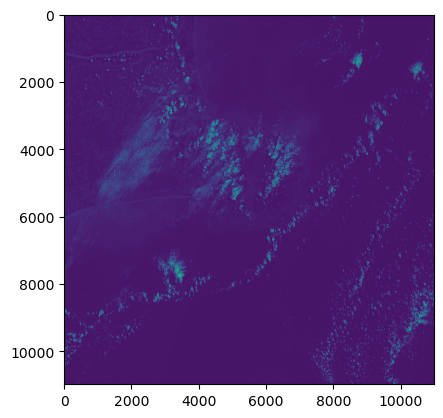

In [60]:
import rasterio
import matplotlib.pyplot as plt

# input file path
input_file = '/Users/tnmthai/Downloads/R10m/multi_band.tif'

# open input file
with rasterio.open(input_file) as src:
    # read the image as a numpy array
    img = src.read(3)

# plot the image
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


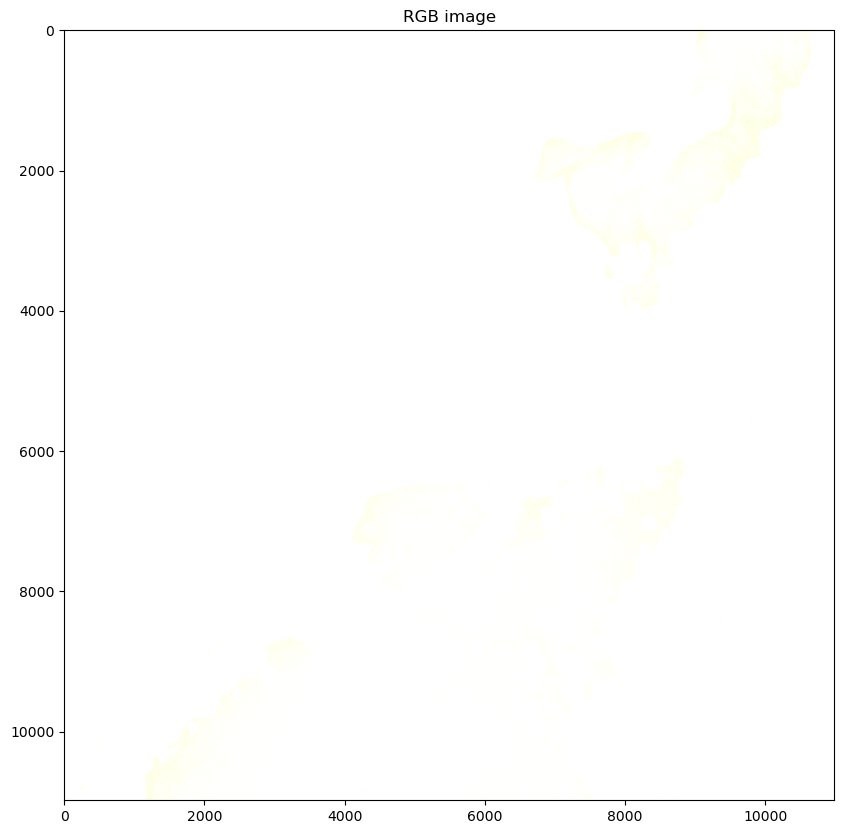

In [63]:
import rasterio
import matplotlib.pyplot as plt

# input GeoTIFF file path
input_file = '/Users/tnmthai/Downloads/R10m/multi_band.tif'

# open input file using rasterio.open()
with rasterio.open(input_file) as src:
    # read the image data and metadata
    img = src.read()

# select the bands to use
bands = [2, 1, 0]  # e.g., use the first 3 bands (RGB)

# plot the selected bands
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img[bands, :, :].transpose((1, 2, 0)))
ax.set_title('RGB image')
plt.show()


In [62]:
img.shape

(3, 10980, 10980)